In [35]:
import pandas as pd
import os
import mplcursors
import pprint
import numpy as np
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv(os.path.join("data", "bt_symmetric.csv"))

In [37]:
df = df[df["user_b"] != -1]

time_max = df["# timestamp"].max()
times = []
connections = []
for i in range(0, time_max, 300):
    df_temp = df[df["# timestamp"] == i]
    if len(df_temp) > 250:
        times.append(i)
        connections.append(len(df_temp))
    else:
        times.append(-1)
        connections.append(-1)
    

In [38]:
users = set(df["user_a"]) | set(df["user_b"])
connections_counter = dict([[x,[]] for x in users])
connections_counter_fin = dict([[x,[]] for x in users])

for i in range(0, time_max, 300):
    if i not in times:
        continue
    
    for key, value in connections_counter.items():
        connections_counter[key].append(0)
    
    if i in times:
        df_temp = df[df["# timestamp"] == i]
        for _, row in df_temp.iterrows():
            connections_counter[row["user_a"]][-1] += 1
            connections_counter[row["user_b"]][-1] += 1

for key, value in connections_counter.items():
        connections_counter_fin[key] = np.mean(value)



                           
        
    

In [41]:
for key, value in connections_counter.items():
        connections_counter_fin[key] = np.sum(value)

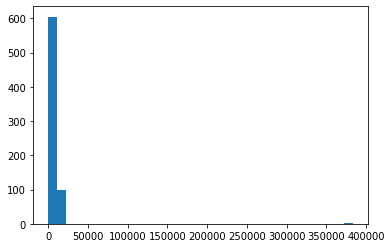

In [42]:
connections_counter_fin.pop(-2)
plt.hist(list(connections_counter_fin.values()), bins = 35)
plt.show() 